# 1) Генератор  данных

## Генератор равномерно распределенных случайных чисел (основа для дальнейших генераторов)

In [1]:
import math
import copy
import numpy as np
import matplotlib.pyplot as plt
start_sid = 48596.0
def random(a=0,b=1):
    global start_sid
    alf = 359706
    m = 3254
    while True:
        start_sid = (start_sid * alf) % m
        return (start_sid / m) * (b - a) + a

## Генератор нормально распределенных случайных чисел

In [2]:
def nodmal(m=0,d=1):
    n = 12
    x = 0
    for i in range (n):
         x = x + random()
    return d * (12/n)**(1/2) * (x - n/2) + m
def NormalData(N, m1=0, d1=1, m2=0, d2=1):
    x = []
    for i in range(N):
        #x.append([nodmal(m1,d1),nodmal(m2,d2)])
        x.append(nodmal(m1,d1))
    return x

## Генератор экспоненциально распределенных случайных чисел

In [3]:
def exponential(lamda = 1):
    return -math.log(1 - random())/lamda
def ExponentialData(N, lamda1=1, lamda2=1):
    x = []
    for i in range(N):
        #x.append([exponential(lamda1),exponential(lamda2)])
        x.append(exponential(lamda1))
    return x

## Генератор расмределения случайных чисел с тремя горбами (3 нормальных распределения с разными параметрами)

In [4]:
def GorbData(N,m1=-8,d1=1,m2=0,d2=4,m3=12,d3=2):
    x = []
    for i in range(N):
        r = random()
        if r > 0.66:
            x.append(nodmal(m1,d1))
        elif r > 0.33:
            x.append(nodmal(m2,d2))
        else:
            x.append(nodmal(m3,d3))
    return x

# 2) Реализация метода Парзена-Розенблатта

In [5]:
def k1(r):
    return 3/4*(1-r**2)
def k2(r):
    return 15/16*((1-r**2)**2)
def k3(r):
    return 1-abs(r)
def k4(r):
    return ((2 * math.pi)**(-1/2)) * np.exp(-1/2 * (r**2))
def k5(r):
    return 1/2*abs(r)

def p(x,data,h):
    rez = 0
    for i in data:
        rez = rez + k4((x - i)/h)
    return rez / (len(data)*h)

# 3) Востоновление плотновти в виде картинки

Востонавление плотности экспонинциального распределения с параметром lamda = 1


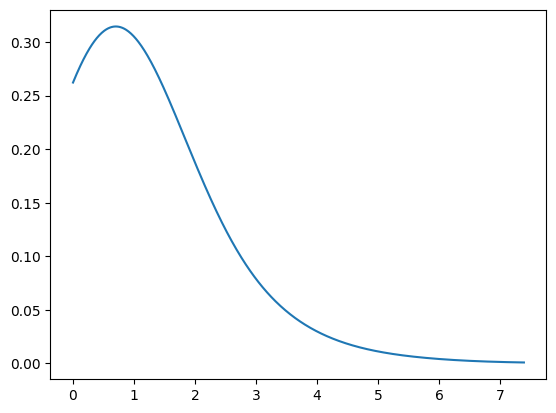

Востонавление плотности нормального распределения с параметрами m=0, d=1


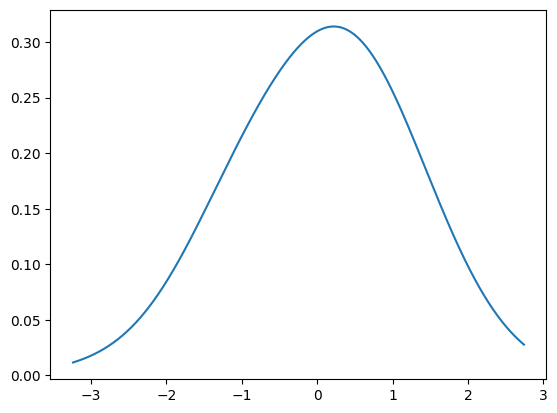

Востонавление плотности смеси нормальных распределений с параметрами m1=-8, d1=1, m2=0, d2=4, m3=12, d3=2


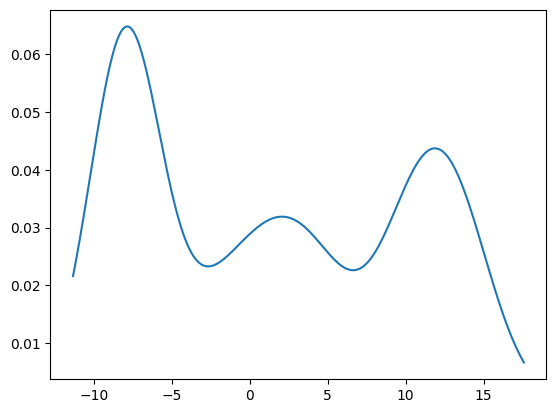

In [6]:
print("Востонавление плотности экспонинциального распределения с параметром lamda = 1")
data = ExponentialData(1000)
minn = min(data)
maxx = max(data)
x = np.arange(minn, maxx, 0.01)
plt.plot(x, p(x,data,h=1))
plt.show()
print("Востонавление плотности нормального распределения с параметрами m=0, d=1")
data = NormalData(1000)
minn = min(data)
maxx = max(data)
x = np.arange(minn, maxx, 0.01)
plt.plot(x, p(x,data,h=0.7))
plt.show()
print("Востонавление плотности смеси нормальных распределений с параметрами m1=-8, d1=1, m2=0, d2=4, m3=12, d3=2")
data = GorbData(1000)
minn = min(data)
maxx = max(data)
x = np.arange(minn, maxx, 0.01)
plt.plot(x, p(x,data,h=2))
plt.show()

# 4) Для 1 из 3х наборов приминить оптимизацию ширины окна методом LOO

LLO при стартовом значении 349.478190562931
Функция плотности при стартовом h:


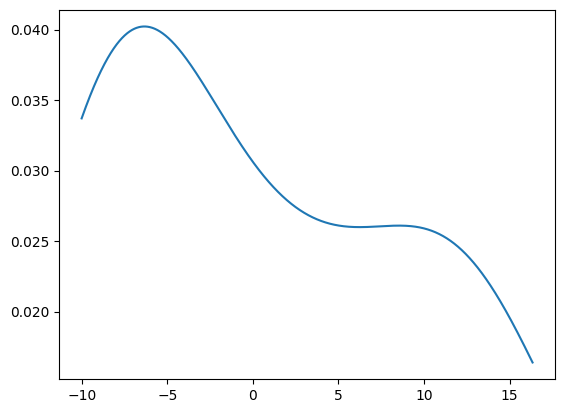

In [7]:
def LLO(data,h):
    llo = 0
    for i in range(len(data)):
        llo = llo - math.log(p(data[i],copy.copy(data[:i] + data[i+1:]),h=h))
    return llo

def my_sgd_adaptiv(X0, data, lr = 0.1, N_it = 100, gamma = 0.5, delt = 0.001):
    # Движется в 1 направлении охотнее других
    # Adagrad
    x = X0
    Gt = 0
    for i in range(N_it):
        loss = - (LLO(data, x + delt) - LLO(data, x - delt)) / (2 * delt)
        Gt = gamma * Gt + loss**2
        x += (lr/(Gt**(1/2))) * loss
    return x

data = GorbData(100)
minn = min(data)
maxx = max(data)
x = np.arange(minn, maxx, 0.01)

print("LLO при стартовом значении",LLO(data,5))
print("Функция плотности при стартовом h:")
plt.plot(x, p(x,data,h=5))
plt.show()

Оптимальный h по критерию LLO = 0.6346292839889132
LLO при оптимальном значении 317.3779098109733
Функция плотности при оптимальном h:


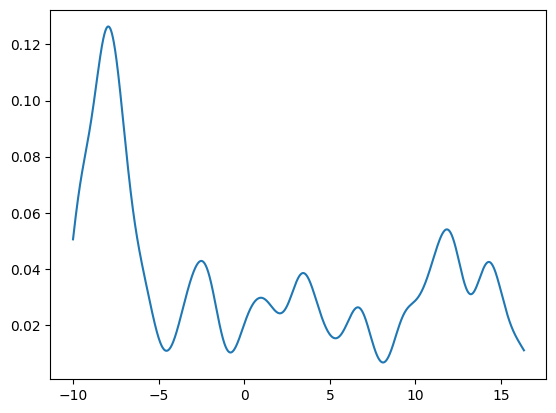

In [8]:
optimym_h = my_sgd_adaptiv(5,data, lr = 0.1, N_it = 100, gamma = 0.5, delt = 0.00001)
print("Оптимальный h по критерию LLO =",optimym_h)
print("LLO при оптимальном значении",LLO(data,optimym_h))
print("Функция плотности при оптимальном h:")
plt.plot(x, p(x,data,h=optimym_h))
plt.show()

# 5) Для данных с 2 или более горбами приминить алгоритм из scikit-learn

Evaluate the components' density for each sample


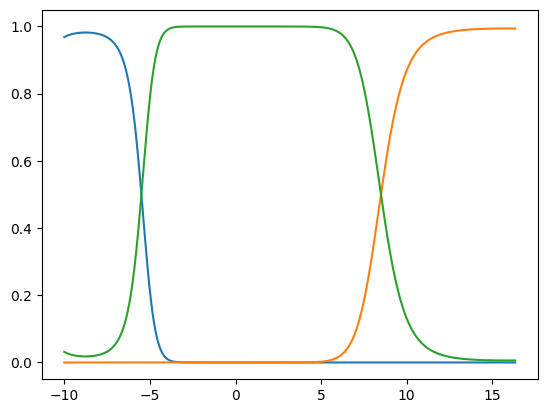

In [9]:
import numpy as np
from sklearn.mixture import GaussianMixture
dataX = np.array(data).reshape(-1, 1)
gm = GaussianMixture(n_components=3, random_state=0).fit(dataX)
gm.means_
print("Evaluate the components' density for each sample")
plt.plot(x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,0],x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,1],x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,2])
plt.show()